In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/Deep Learning/airline-passengers.csv' , usecols=[1])

In [ ]:
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)# 67 % FOR TRAINING
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY) #REQUIRED TO BUILD A NEURAL NETWORK

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainY

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
       115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
       140., 145., 150., 178., 163., 172., 178., 199., 199., 184., 162.,
       146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
       191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
       237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302.,
       293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
       364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
       374., 413., 405., 355., 306., 271.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 1s - loss: 24822.6172 - 697ms/epoch - 15ms/step
Epoch 2/200
47/47 - 0s - loss: 17601.9316 - 66ms/epoch - 1ms/step
Epoch 3/200
47/47 - 0s - loss: 11719.6885 - 54ms/epoch - 1ms/step
Epoch 4/200
47/47 - 0s - loss: 7118.5054 - 69ms/epoch - 1ms/step
Epoch 5/200
47/47 - 0s - loss: 4022.0945 - 59ms/epoch - 1ms/step
Epoch 6/200
47/47 - 0s - loss: 2157.8289 - 56ms/epoch - 1ms/step
Epoch 7/200
47/47 - 0s - loss: 1198.9646 - 55ms/epoch - 1ms/step
Epoch 8/200
47/47 - 0s - loss: 760.0094 - 61ms/epoch - 1ms/step
Epoch 9/200
47/47 - 0s - loss: 599.8587 - 72ms/epoch - 2ms/step
Epoch 10/200
47/47 - 0s - loss: 559.9528 - 59ms/epoch - 1ms/step
Epoch 11/200
47/47 - 0s - loss: 542.6978 - 57ms/epoch - 1ms/step
Epoch 12/200
47/47 - 0s - loss: 538.8621 - 59ms/epoch - 1ms/step
Epoch 13/200
47/47 - 0s - loss: 543.3370 - 58ms/epoch - 1ms/step
Epoch 14/200
47/47 - 0s - loss: 536.7386 - 59ms/epoch - 1ms/step
Epoch 15/200
47/47 - 0s - loss: 539.8508 - 62ms/epoch - 1ms/step
Epoch 16/200
47/47 - 0

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 530.93 MSE (23.04 RMSE)
Test Score: 2352.19 MSE (48.50 RMSE)


In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

2/2 [==============================] - 0s 6ms/step


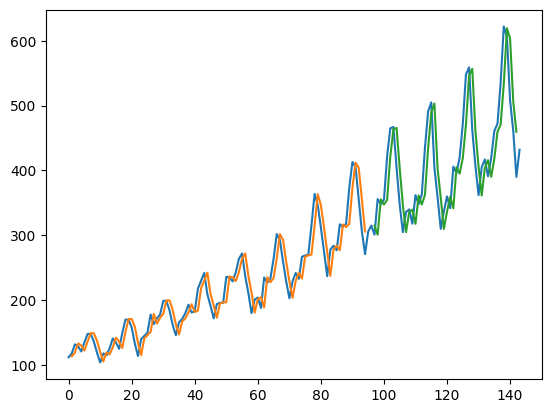

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(trainPredict) + (look_back*2)+1

97